In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import astropy.units as u
from astropy.table import Table

In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [3]:
# figure out luminosity for GJ 1243 in Kepler and TESS bands w/ Padova Isochrone (from AB mags)
# http://simbad.u-strasbg.fr/simbad/sim-basic?Ident=GJ+1243&submit=SIMBAD+search

J = 8.586
H = 8.045
K = 7.773
Je = 0.023
He = 0.020
Ke = 0.016

g =13.683
r =12.357 
i =11.112
ge=0.05
re=0.12
ie=0.25

plx=83.4814 
plxe = 0.0366

In [4]:
iso_file = 'output450252553987.dat' # Age = 1e9
# iso_file = 'output118463856707.dat' # Age = 5e9

df = pd.read_table(iso_file, delim_whitespace=True, skiprows=11)

ok = np.where((df['label']<2) & (df['TESSmag']> 1.3))[0][::-1]

11.065768253968251 9.659530158730156


(15, -5)

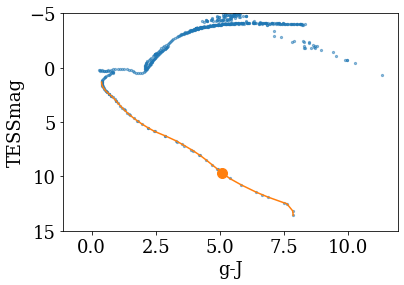

In [5]:
Tmag = np.interp(g-J, df['gmag'].values[ok] - df['Jmag'].values[ok], df['TESSmag'].values[ok])
Kmag = np.interp(g-J, df['gmag'].values[ok] - df['Jmag'].values[ok], df['Keplermag'].values[ok])

print(Kmag, Tmag)

plt.figure()
plt.scatter(df['gmag'].values - df['Jmag'].values, df['TESSmag'].values, alpha=0.5,s=5)
plt.plot(df['gmag'].values[ok] - df['Jmag'].values[ok], df['TESSmag'].values[ok], c='C1')
plt.gca().invert_yaxis()
plt.scatter(g-J, Tmag, s=100)
plt.xlabel('g-J')
plt.ylabel('TESSmag')

plt.ylim(15,-5)

In [6]:
# Kepler, AB Mags
c = 2.99792458e18 # speed of light in A/s
pivot_wave_k = 6400. # A
filter_width_k = 4000. # A

f_nu = (10**((Kmag + 48.6)/ (-2.5)))
f_lambda = f_nu * c / pivot_wave_k**2
L_KEP = 4 * np.pi * ((10*u.pc).to(u.cm)).value**2 * f_lambda * (filter_width_k)

print('logL Kepler:',np.log10(L_KEP))

logL Kepler: 30.67812439916038


In [7]:
# TESS, AB Mags
pivot_wave_t = 7865. 
filter_width_t = 4000. # A

f_nu = (10**((Tmag + 48.6)/ (-2.5)))
f_lambda = f_nu * c / pivot_wave_t**2
L_TESS = 4 * np.pi * ((10*u.pc).to(u.cm)).value**2 * f_lambda * (filter_width_t)
print('logL TESS:',np.log10(L_TESS))

logL TESS: 31.06158213130478


In [8]:
'''
# 0th mag TESS Flux, from Sullivan+2015: https://ui.adsabs.harvard.edu/abs/2015ApJ...809...77S/abstract
Tf0 = 4.03e-6*u.erg/u.s/u.cm**2

# 4pi x d^2 x Flux, using Absolute Mag from isochrone & 10pc
L_TESS_wrong = 4 * np.pi * ((10*u.pc).to(u.cm))**2 * (10**(-Tmag/2.5)*Tf0)

print('logL TESS:',np.log10(L_TESS_wrong.value)) ### WRONG - SHOULD BE AB Mags!
''';

In [9]:
# let's do some quick gaussian errors...
Num = 10000
T_N = np.zeros(Num, dtype=np.float)
K_N = np.zeros(Num, dtype=np.float)

dist_n = np.random.normal(loc=10, scale=0.005, size=Num)
g_n = np.random.normal(loc=g, scale=ge, size=Num)
J_n = np.random.normal(loc=J, scale=Je, size=Num)

Tmag_n = np.interp(g_n-J_n, df['gmag'].values[ok] - df['Jmag'].values[ok], df['TESSmag'].values[ok])
Kmag_n = np.interp(g_n-J_n, df['gmag'].values[ok] - df['Jmag'].values[ok], df['Keplermag'].values[ok])

# T_N = np.log10((4 * np.pi * ((dist_n*u.pc).to(u.cm).value)**2 * (10**(-Tmag_n/2.5)*Tf0.value)))

f_nu = (10**((Kmag_n + 48.6)/ (-2.5)))
f_lambda = f_nu * c / (pivot_wave_k)**2
K_N = np.log10(4 * np.pi * ((dist_n*u.pc).to(u.cm)).value**2 * f_lambda * (filter_width_k))

pivot_wave_t = 7865. 
filter_width_t = 4000. # A

f_nu = (10**((Tmag_n + 48.6)/ (-2.5)))
f_lambda = f_nu * c / pivot_wave_t**2
T_N = np.log10(4 * np.pi * ((dist_n*u.pc).to(u.cm)).value**2 * f_lambda * (filter_width_t))
# print('logL TESS:',np.log10(L_TESS))

print(np.mean(K_N), np.mean(T_N))
print(np.std(K_N), np.std(T_N))

30.678313568940734 31.06181847084391
0.044994629988206025 0.03981422400683345


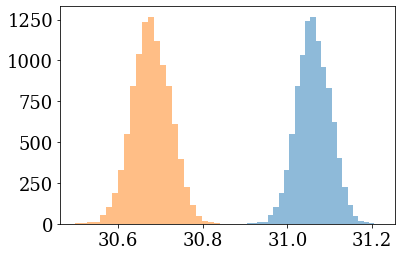

In [10]:
_ = plt.hist(T_N,bins=25, alpha=0.5)
_ = plt.hist(K_N,bins=25, alpha=0.5)

In [11]:
# The numbers used when submitted originally
LUMIN =  30.352907 # updated version from my IDL code
E_POINT =  30.037849  # updated version from my IDL Code

print(LUMIN-E_POINT)
print(np.mean(T_N) - np.mean(K_N))

0.31505799999999695
0.38350490190317643
